In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, LSTM, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
import altair as alt

In [4]:
credit_df = pd.read_csv('Downloads/UCI_Credit_Card.csv' , index_col = 0)
credit_df


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [6]:
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=123)
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
19683,200000.0,2,2,1,46,0,0,0,0,0,...,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0,0
11063,120000.0,2,1,1,32,-1,-1,-1,-1,-1,...,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0,1
198,20000.0,2,1,2,22,0,0,0,0,-1,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23621,100000.0,2,5,2,34,0,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26032,290000.0,2,2,2,29,0,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0


In [12]:
dist = train_df["default.payment.next.month"].value_counts(normalize=True)
dist[0]
dist_df = pd.DataFrame([
      {"Target": "Target: 0", "Distribution": dist[0]},
      {"Target": "Target: 1", "Distribution": dist[1]}

])

# Examining the distribution of the target values in target (class imbalance)
alt.Chart(dist_df).mark_bar().encode(
    x=alt.X('Target'),
    y='Distribution')

alt.Chart(...)

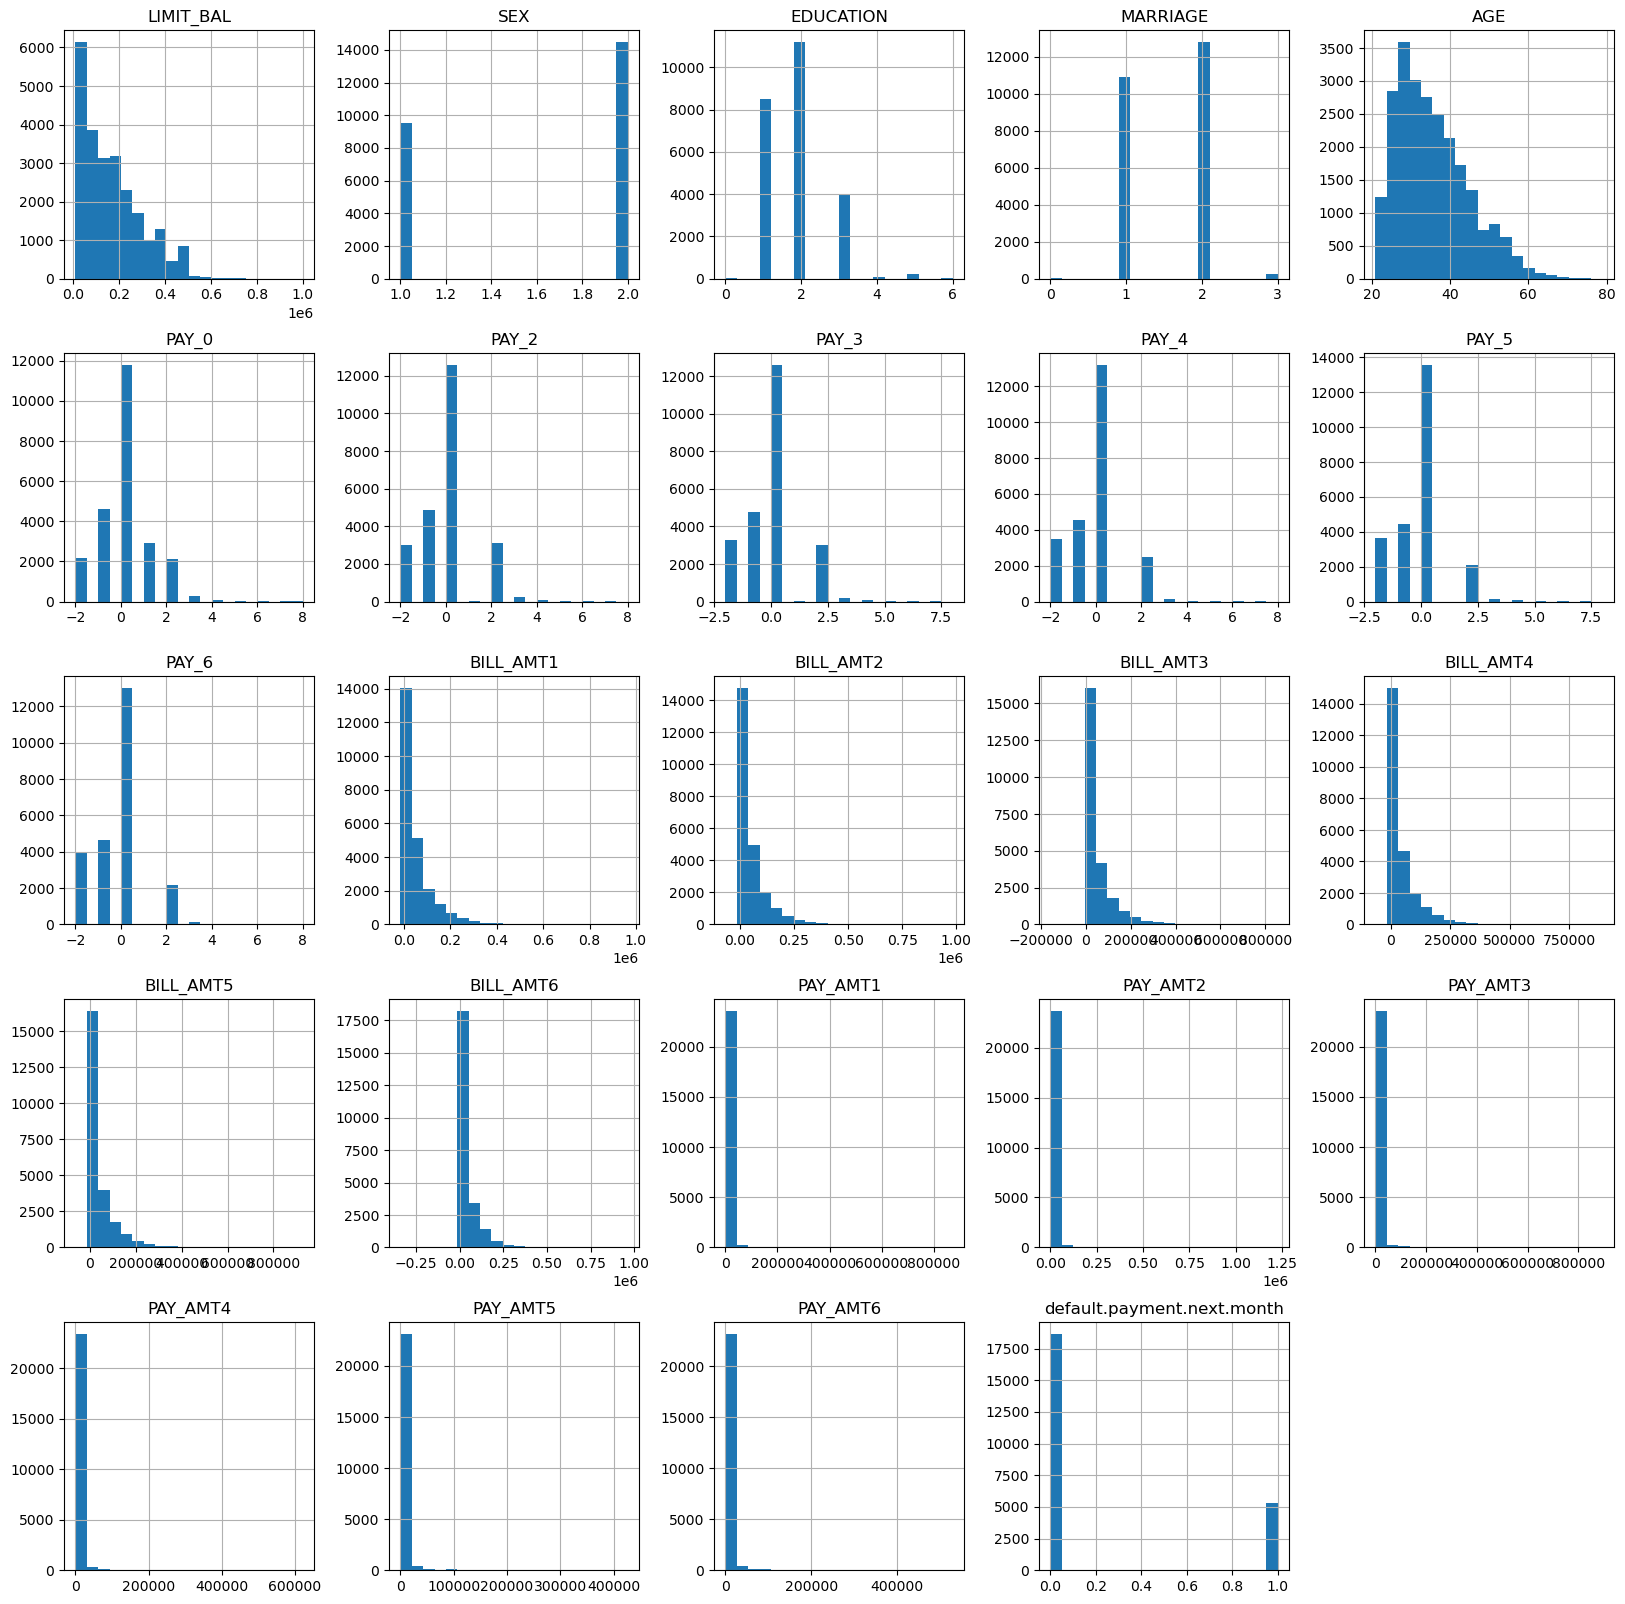

In [14]:
train_df.hist(figsize=(20,20), bins=20);

In [16]:
train_df["MARRIAGE"].replace(0, 3, inplace=True)
train_df["MARRIAGE"].unique()

array([1, 2, 3])

In [18]:
train_df["EDUCATION"].replace((0, 5,6), 4, inplace=True)
train_df["EDUCATION"].unique()


array([2, 1, 4, 3])

In [20]:
train_df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [22]:
target = "default.payment.next.month"

binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
numeric_features = list(
    set(train_df.columns) - set(categorical_features) - set(binary_features) - set([target])
)
numeric_features

['PAY_AMT5',
 'PAY_2',
 'BILL_AMT2',
 'PAY_AMT6',
 'BILL_AMT1',
 'LIMIT_BAL',
 'PAY_5',
 'BILL_AMT5',
 'PAY_AMT2',
 'PAY_0',
 'PAY_AMT1',
 'BILL_AMT6',
 'PAY_AMT4',
 'PAY_6',
 'PAY_AMT3',
 'PAY_4',
 'PAY_3',
 'BILL_AMT4',
 'BILL_AMT3',
 'AGE']

In [24]:
X_train, y_train = train_df.drop(columns=["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns=["default.payment.next.month"]), test_df["default.payment.next.month"]


In [26]:
X_test_original = X_test.copy()

In [79]:
no_scale_features = ['PAY_2', 'PAY_5', 'PAY_0', 'PAY_6', 'PAY_4', 'PAY_3']

In [83]:
scale_features = [feat for feat in numeric_features if feat not in no_scale_features]

In [85]:
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', StandardScaler(), scale_features),                      # Apply scaler only here
    ('unscaled_num', 'passthrough', no_scale_features),                   # Leave discrete numeric untouched
    ('bin', OneHotEncoder(drop="if_binary"), binary_features),            # Encode binary
    ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features) # Encode categorical
])

In [90]:
pipe_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64,32), max_iter=500, random_state=42))
])
pipe_mlp.fit(X_train, y_train)
mlp_preds = pipe_mlp.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, mlp_preds)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7402


In [102]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, mlp_preds)
print("F1 Score:", f1)

F1 Score: 0.4092459264873058


In [94]:
predictions_df = pd.DataFrame({'Predicted_Label': mlp_preds})

In [104]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [106]:
import pandas as pd
import numpy as np
# from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

In [122]:

categorical_features = ["SEX", "EDUCATION", "MARRIAGE"]
target = "Predicted_Label"

In [124]:
numeric_features = [c for c in merged_df.columns 
    if c not in categorical_features and c != target]

In [126]:
def cramers_v(conf_mat):
    chi2, _, _, _ = chi2_contingency(conf_mat)
    n = conf_mat.values.sum()
    r, k = conf_mat.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [128]:
records = []

In [130]:
for feat in numeric_features:
    r, p = pointbiserialr(merged_df[feat], merged_df[target])
    if p < 0.05:
        records.append({'Feature': feat,
                'Type': 'Numeric',
                'p_value': p,
                'effect_size': abs(r)
            })

for feat in categorical_features:
    conf = pd.crosstab(merged_df[feat], merged_df[target])
    chi2_stat, p, _, _ = chi2_contingency(conf)
    if p < 0.05:
        v = cramers_v(conf)
        records.append({'Feature': feat,
                'Type': 'Categorical',
                'p_value': p,
                'effect_size': v
            })


In [132]:
if not records:
    print("No features reached p < 0.05.")
else:
    eff_df = pd.DataFrame(records)
    eff_df = eff_df.sort_values('effect_size', ascending=False).reset_index(drop=True)
    
    # 5. Display ranked features
    display(eff_df[['Feature', 'Type', 'p_value', 'effect_size']])

,Feature,Type,p_value,effect_size
0,PAY_0,Numeric,4.265799e-179,0.356307
1,PAY_2,Numeric,7.020557e-150,0.327375
2,PAY_3,Numeric,2.195678e-142,0.319420
3,PAY_4,Numeric,2.744378e-124,0.299140
4,PAY_5,Numeric,1.251827e-118,0.292450
5,PAY_6,Numeric,1.687476e-102,0.272312
6,LIMIT_BAL,Numeric,4.654154e-41,0.171987
7,PAY_AMT4,Numeric,6.377224e-06,0.058231
8,PAY_AMT1,Numeric,7.445251e-06,0.057807
9,PAY_AMT5,Numeric,1.528175e-05,0.055798


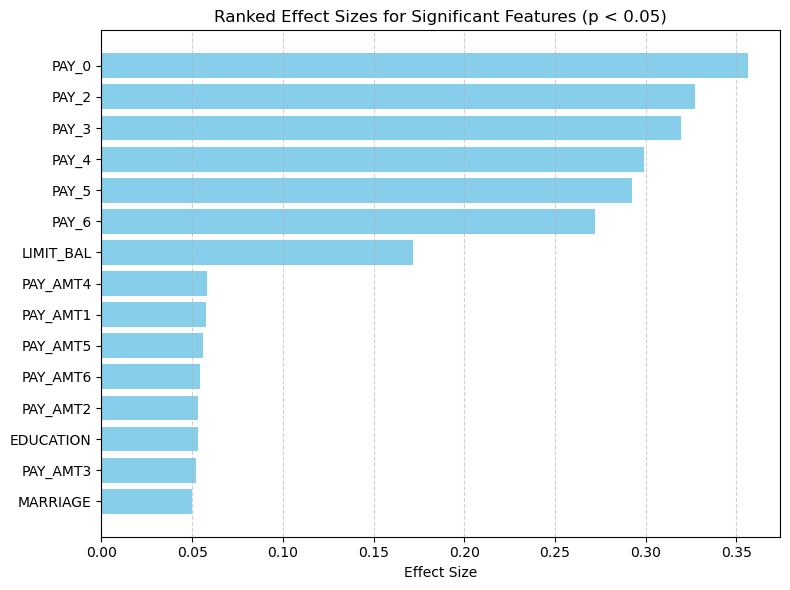

In [134]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['effect_size'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (p < 0.05)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [136]:
merged_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Predicted_Label
0,40000.0,2,2,2,26,-1,0,0,0,-1,...,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0,0
1,80000.0,2,3,1,59,0,0,0,0,0,...,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0,0
2,170000.0,2,1,2,30,2,2,2,2,2,...,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,1
3,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,1,2,1,43,0,0,0,0,0,...,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,160000.0,1,1,1,51,0,0,0,2,2,...,2457.0,4912.0,3669.0,1331.0,2473.0,0.0,2500.0,0.0,0.0,1
5996,70000.0,1,3,2,53,0,0,0,0,0,...,16100.0,16437.0,16764.0,1554.0,1263.0,576.0,596.0,600.0,622.0,0
5997,10000.0,1,2,1,45,1,2,2,2,2,...,6267.0,-610.0,-220.0,0.0,4312.0,0.0,0.0,780.0,1150.0,0
5998,50000.0,1,3,0,50,0,0,0,-1,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
